In [1]:
import numpy as np 
import pandas as pd 

In [3]:
dataset = pd. read_csv ("C:\\Users\\srmve\\Documents\\Data.csv") 
dataset 

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
dataset.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
dataset. describe () 

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [6]:
x = dataset. iloc [:, :-1].values 
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [7]:
y = dataset. iloc [:, 3].values 
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [8]:
print (dataset. isnull (). sum ())

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [9]:
dataset. dropna (inplace = True) 
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [10]:
from sklearn. impute import SimpleImputer 
imputer = SimpleImputer (missing_values = np.nan, strategy = 'mean')

In [11]:
imputer.fit(x[:,1:3]) 

SimpleImputer()

In [12]:
x[:,1:3] = imputer.transform(x[:,1:3]) 
print(x[:,1:3])

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


In [13]:
from sklearn. compose import ColumnTransformer 
from sklearn. preprocessing import OneHotEncoder 
ct = ColumnTransformer (transformers = [('encoder', OneHotEncoder (), [0])], remainder = 
"passthrough") 
x = np. array(ct.fit_transform(x)) 
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder () 
y=le.fit_transform(y) 
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [15]:
from sklearn. model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 1) 
print(x_train) 

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [16]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]


In [17]:
print(y_train)

[1 0 0 1 1 0 1]


In [18]:
print(y_test)

[0 1 0]


In [19]:
from sklearn. preprocessing import StandardScaler 
scaler = StandardScaler () 
x_train[:,2:]=scaler.fit_transform(x_train[:,2:]) 
x_test[:,2:]=scaler.fit_transform(x_test[:,2:]) 
print(x_train) 
print(x_test) 

[[0.0 1.0 -0.6324555320336758 -0.038910211282047996 -0.22960023388015188]
 [1.0 0.0 -0.6324555320336758 0.5058327466666259 0.49120534884662787]
 [0.0 0.0 1.5811388300841895 -0.3112816902563849 -0.4731156334500103]
 [0.0 0.0 1.5811388300841895 -1.809324824615238 -1.6127677034369463]
 [1.0 0.0 -0.6324555320336758 1.0505757046152997 1.1048641557626704]
 [0.0 1.0 -0.6324555320336758 1.3229471835896367 1.455526331143266]
 [1.0 0.0 -0.6324555320336758 -0.7198389087178904 -0.736112264985457]]
[[0.0 1.0 -0.7071067811865475 -1.3880272079128577 -0.5513801778287937]
 [1.0 0.0 -0.7071067811865475 0.4594174561401711 1.40351317992784]
 [0.0 0.0 1.4142135623730951 0.9286097517726866 -0.8521330020990451]]


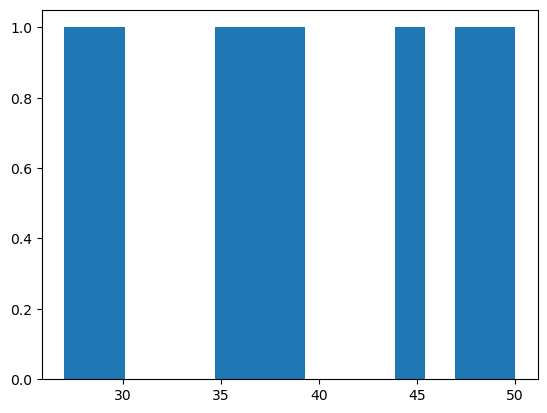

In [20]:
import matplotlib. pyplot as plt 
plt. hist(dataset['Age'], bins=15) 
plt. show ()

In [21]:
lowerLimit=dataset['Age']. quantile (0.05) 
print(lowerLimit)

28.05


In [23]:
print(dataset[dataset['Age'] <lowerLimit]) 

  Country   Age   Salary Purchased
1   Spain  27.0  48000.0       Yes


In [24]:
upperLimit=dataset['Age']. quantile (0.95) 
print(upperLimit)

49.3


In [25]:
print(dataset[dataset['Age']>upperLimit]) 

   Country   Age   Salary Purchased
8  Germany  50.0  83000.0        No


In [27]:
dataset = dataset[(dataset['Age']>lowerLimit) & (dataset['Age'] <upperLimit)] 
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
9   France  37.0  67000.0       Yes
